# DS - Python with Data Science

## Dimensionality reduction

### Solutions

### Debug code

### 1) Run a Random forest classification algorithm

Run a random forest classification algorithm on the data and time how long it takes to run.

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#read in the data
NBA = pd.read_csv("Data/NBA_cleaned.csv")
#drop the necessary columns
NBA.drop(columns = ['Component 1', 'Component 2',
                   'Dimension 1', 'Dimension 2'],
        inplace = True)

In [ ]:
#print the columns
NBA.columns

In [4]:
#create an X and y dataset based on the variables
#you want to use
X = NBA.drop(columns= ["Player", "Pos"])
y = NBA.Pos

In [5]:
#split the data into a training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [25]:
#build the random forest classifier
#with 100 estimators
#max depth of 10
clf = RandomForestClassifier(n_estimators =100, 
                             oob_score=True, 
                             max_depth =10,
                            random_state = 42)

In [26]:
%%time
#fit it to the training data
#and chekc the time
clf.fit(X_train, y_train)

Wall time: 176 ms


RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

In [27]:
#extract the predictions
test_pred_random_forest = clf.predict(X_test)

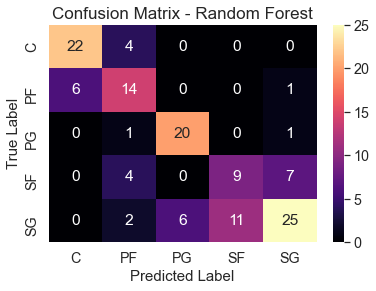

<Figure size 864x864 with 0 Axes>

In [28]:
# get the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_test,
                                             test_pred_random_forest)

#turn this into a dataframe
matrix2_df = pd.DataFrame(confusion_matrix2)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3) # for label size
plt.figure(figsize=(12,12))

plot = sns.heatmap(matrix2_df, 
                   annot=True, 
                   fmt='g', 
                   ax=ax, 
                   cmap = "magma") 
#fmt so that numbers aren't scientific

#axis labels and title
ax.set_title('Confusion Matrix - Random Forest', fontsize = 17)
ax.set_xlabel('Predicted Label', fontsize = 15)
ax.set_ylabel('True Label'     , fontsize = 15)

# change tick labels from 0-4 to 1-5
labels = ("C", "PF", "PG", "SF", "SG")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()


fig = plot.get_figure()


In [29]:
#print the metrics classification report
print (metrics.classification_report(y_test, test_pred_random_forest))

              precision    recall  f1-score   support

           C       0.79      0.85      0.81        26
          PF       0.56      0.67      0.61        21
          PG       0.77      0.91      0.83        22
          SF       0.45      0.45      0.45        20
          SG       0.74      0.57      0.64        44

    accuracy                           0.68       133
   macro avg       0.66      0.69      0.67       133
weighted avg       0.68      0.68      0.67       133



### 2) Run a Random forest classification algorithm

But this time after the data has been passed through a PCA algorithm and compare the difference in time and accuracy in the model

In [30]:
#set up the standard scaler
sc = StandardScaler()

#extract the columns you want to rescale
cols = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3P%',
       '2P%', 'FT%', 'FG%', 'eFG%']

#fit the scalers on the data
scalers = [sc.fit(NBA[c].values.reshape(-1,1)) for c in cols]

In [31]:
#extract the X_train and X_test dataset
tr_scaled = X_train[cols].copy()
tst_scaled = X_test[cols].copy()

#transform all the columns
#users the scalers we created
for i in range(0, len(cols)):
    tr_scaled[cols[i]] = (scalers[i]
                          .transform(
                              X_train[cols[i]]
                              .values
                              .reshape(-1,1)))
    tst_scaled[cols[i]] = (scalers[i]
                          .transform(
                              X_test[cols[i]]
                              .values
                              .reshape(-1,1)))

In [32]:
#fit the pca with 15 components
pca = PCA(n_components = 15, whiten = True)
#fit it to the scaled dataset you crete
pca.fit(tr_scaled)

#extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

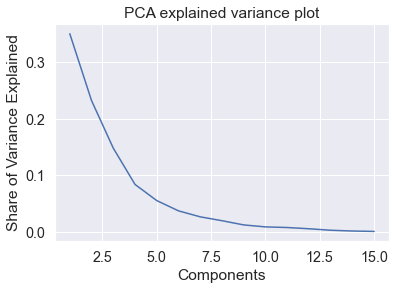

In [33]:
#create an x for each component
x = np.arange(1,len(explained_variance)+1)

#plot the results
plt.plot(x, explained_variance)

#add a y label
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")

#show the resuling plot
plt.show()

In [34]:
#iterate over the components
#to print the explained variance
for i in range(0, 15):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 34.99% of variance
Component  1 accounts for 23.20% of variance
Component  2 accounts for 14.82% of variance
Component  3 accounts for 8.42% of variance
Component  4 accounts for 5.57% of variance
Component  5 accounts for 3.76% of variance
Component  6 accounts for 2.71% of variance
Component  7 accounts for 2.02% of variance
Component  8 accounts for 1.28% of variance
Component  9 accounts for 0.93% of variance
Component 10 accounts for 0.82% of variance
Component 11 accounts for 0.60% of variance
Component 12 accounts for 0.34% of variance
Component 13 accounts for 0.21% of variance
Component 14 accounts for 0.14% of variance


Extract the number of components based on the 1% cutoff (if you wanted you could experiment with different cut off methods and how that may affect the model)

In [35]:
#set the components to 8
pca = PCA(n_components=8, whiten=True) 
#fit the model to our data and extract the results
pca.fit(tr_scaled)

PCA(n_components=8, whiten=True)

In [36]:
#extract a train and test pca dataset
train_pca = pca.transform(X_train)
test_pca = pca.transform(X_test)

In [37]:
%%time
#fit it to the training data
#make note of the time
clf.fit(train_pca, y_train)

Wall time: 150 ms


RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

In [39]:
#extract the predictions
test_pred_random_forest = clf.predict(test_pca)

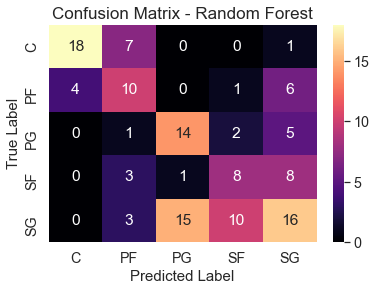

<Figure size 864x864 with 0 Axes>

In [40]:

# get the confusion matrix
confusion_matrix2 = metrics.confusion_matrix(y_test, test_pred_random_forest)


matrix2_df = pd.DataFrame(confusion_matrix2)

# set axis to add title and axis labels later
ax = plt.axes()
sns.set(font_scale=1.3) # for label size
plt.figure(figsize=(12,12))

plot = sns.heatmap(matrix2_df, annot=True, fmt='g', ax=ax, cmap = "magma") #fmt so that numbers aren't scientific

#axis labels and title
ax.set_title('Confusion Matrix - Random Forest', fontsize = 17)
ax.set_xlabel('Predicted Label', fontsize = 15)
ax.set_ylabel('True Label'     , fontsize = 15)

# change tick labels from 0-4 to 1-5
labels = ("C", "PF", "PG", "SF", "SG")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()


fig = plot.get_figure()

In [41]:
#print the metrics
print (metrics.classification_report(y_test, test_pred_random_forest))

              precision    recall  f1-score   support

           C       0.82      0.69      0.75        26
          PF       0.42      0.48      0.44        21
          PG       0.47      0.64      0.54        22
          SF       0.38      0.40      0.39        20
          SG       0.44      0.36      0.40        44

    accuracy                           0.50       133
   macro avg       0.51      0.51      0.50       133
weighted avg       0.51      0.50      0.50       133



What has happened to the tim it takes for the model to fit and the resulting performance of the model? Do you think this is a good trade-off? How do you think this will work with a much, much, much larger dataset (both in terms of rows and columns?)

### 3) Fit a t-SNE model with two dimensions on the whole data after using PCA

This time, run a PCA model first to cut down the data to several principle components then run a t-SNE algorithm. What do you notice about the outcome compared to the workshop results?

In [43]:
#extract the columns to scale
cols = ['FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3P%',
       '2P%', 'FT%', 'FG%', 'eFG%']

#extract the total X variables
X_scaled = X.copy()

#scale the results using fit_transform
for col in cols:
    X_scaled[col] = sc.fit_transform(X_scaled[col].values.reshape(-1,1))

In [48]:
#run The PCA algorithm with 15 components
pca = PCA(n_components=15, whiten=True) 

#fit it to our data
pca.fit(X_scaled)

#extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

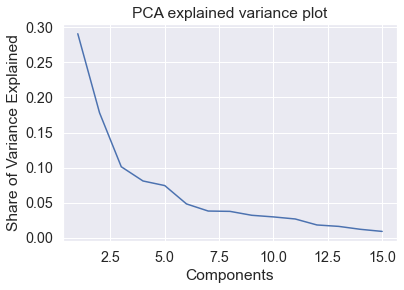

In [49]:
#create an x for each component
x = np.arange(1,len(explained_variance)+1)

#plot the results
plt.plot(x, explained_variance)

#add a y label
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")

#show the resuling plot
plt.show()

In [50]:
#iterate over the components
#to print the explained variance
for i in range(0, 15):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 29.10% of variance
Component  1 accounts for 17.82% of variance
Component  2 accounts for 10.11% of variance
Component  3 accounts for 8.08% of variance
Component  4 accounts for 7.43% of variance
Component  5 accounts for 4.81% of variance
Component  6 accounts for 3.79% of variance
Component  7 accounts for 3.74% of variance
Component  8 accounts for 3.18% of variance
Component  9 accounts for 2.95% of variance
Component 10 accounts for 2.66% of variance
Component 11 accounts for 1.80% of variance
Component 12 accounts for 1.60% of variance
Component 13 accounts for 1.18% of variance
Component 14 accounts for 0.88% of variance


Extract the components that account for 80% of the variance in the variables (what happens if you choose a different selection criteria?)

In [51]:
#set the components to 2
pca = PCA(n_components=7, whiten=True) 
#fit the model to our data and extract the results
X_pca = pca.fit_transform(X_scaled)

In [52]:
#create a dataframe from the dataset
df = pd.DataFrame(data = X_pca,
                 columns = ["Component 1", 
                            "Component 2",
                           "Component 3",
                           "Component 4",
                           "Component 5",
                           "Component 6",
                           "Component 7"])

#merge this with the NBA data
NBA = pd.merge(NBA,
              df,
              left_index=True,
              right_index=True,
              how = "inner")

In [55]:
#set the hyperparmateres for the model with
#the same as in the workshop
#try playing around with them
#how does that affect the outcome?
keep_dims = 2
lrn_rate = 700
prp = 40

#create the model
tsne = TSNE(n_components = keep_dims, 
            perplexity = prp, 
            random_state = 42,
            n_iter = 5000,
            n_jobs = -1)

#extract the 7 components from the NBA dataset
tsne_df = NBA.loc[:,'Component 1':f"Component 7"].copy()

#fit the model
X_embedded = tsne.fit_transform(tsne_df)

In [57]:
#create a dataframe from the dataset
df = pd.DataFrame(data = X_embedded,
                 columns = ["Dimension 1", 
                            "Dimension 2"])

#mere the dataset back with the NBA data
NBA = pd.merge(NBA,
              df,
              left_index = True,
              right_index = True,
              how = "inner")

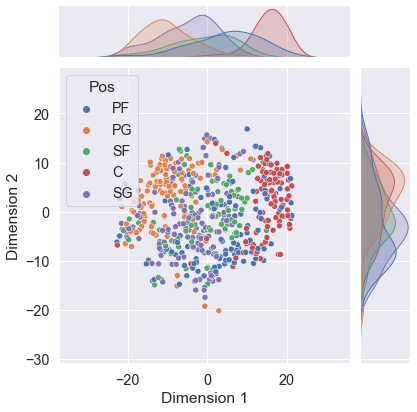

In [58]:
#plot the result
g = sns.jointplot(data = NBA,
                 x = "Dimension 1",
                 y = "Dimension 2",
                 hue = "Pos")

How is this different to just using the t-SNE algorithm? Is it clearer or less clearer? Why may this be?

## Find your own dataset to explore this on your own